In [1]:
%matplotlib inline
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

### 检测边缘

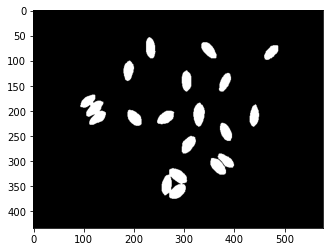

In [2]:
img=cv2.imread("r5.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,th1=cv2.threshold(gray,70,255,cv2.THRESH_BINARY)
img2 = cv2.cvtColor(th1,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

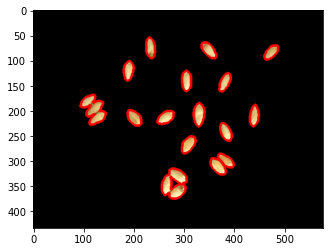

In [5]:
opening = np.array(th1,np.uint8)
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#轮廓提取
# print(contours)
cv2.drawContours(img,contours,-1,(0,0,255),1)
img2= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

### 定义每个点的坐标和夹角

In [45]:
class dots:
    def __init__(self,dot_x,dot_y):
        self.dot_x=dot_x
        self.dot_y=dot_y

### 各个轮廓面积

In [6]:
for contour in contours:
    print(cv2.contourArea(contour))

2158.5
221.0
1126.5
626.0
562.0
601.5
603.0
564.5
755.0
1593.5
2.0
529.0
589.0
572.5
493.5
582.0
575.0


In [57]:
'''
#求面积
area1 = cv2.contourArea(contours[0])
'''
print(contours[0])
print(cv2.contourArea(contours[0]))

[[[277 314]]

 [[276 315]]

 [[274 315]]

 [[273 316]]

 [[272 316]]

 [[271 317]]

 [[271 326]]

 [[270 327]]

 [[268 327]]

 [[267 328]]

 [[265 328]]

 [[262 331]]

 [[262 332]]

 [[261 333]]

 [[261 334]]

 [[260 335]]

 [[260 336]]

 [[259 337]]

 [[259 338]]

 [[258 339]]

 [[258 340]]

 [[257 341]]

 [[257 344]]

 [[256 345]]

 [[256 359]]

 [[257 360]]

 [[257 361]]

 [[258 362]]

 [[258 363]]

 [[261 366]]

 [[261 367]]

 [[264 367]]

 [[267 364]]

 [[268 364]]

 [[270 362]]

 [[271 363]]

 [[271 371]]

 [[273 373]]

 [[275 373]]

 [[276 374]]

 [[285 374]]

 [[286 373]]

 [[288 373]]

 [[289 372]]

 [[290 372]]

 [[291 371]]

 [[292 371]]

 [[300 363]]

 [[300 362]]

 [[302 360]]

 [[302 357]]

 [[303 356]]

 [[303 350]]

 [[302 349]]

 [[302 348]]

 [[300 346]]

 [[297 346]]

 [[296 345]]

 [[298 343]]

 [[301 343]]

 [[302 342]]

 [[304 342]]

 [[305 341]]

 [[305 339]]

 [[306 338]]

 [[305 337]]

 [[305 331]]

 [[304 330]]

 [[304 329]]

 [[301 326]]

 [[301 325]]

 [[300

In [7]:
count = 0    # 米粒个数
margin = 3   # 裁剪边距
for i, contour in enumerate(contours):
    ares = cv2.contourArea(contour)  # 计算包围形状的面积
    if ares < 15:  # 过滤面积小于15的形状
        continue
    count += 1
    rect = cv2.minAreaRect(contour)   # 检测轮廓最小外接矩形，得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
    box = np.int0(cv2.boxPoints(rect))   # 获取最小外接矩形的4个顶点坐标
  #  cv2.drawContours(image, [box], 0, (255, 0, 0), 2)     # 绘制轮廓最小外接矩形
 
    h, w = img.shape[:2]      # 原图像的长和宽
    rect_w, rect_h = int(rect[1][0]) + 1, int(rect[1][1]) + 1      # 最小外接矩形的宽和高
    if rect_w <= rect_h:
        x, y = box[1][0], box[1][1]            # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2], 1)
        rotated_image = cv2.warpAffine(img, M2, (w * 2, h * 2))
        rotated_canvas = rotated_image[y - margin:y + rect_h + margin + 1, x - margin:x + rect_w + margin + 1]
    else:
        x, y = box[2][0], box[2][1]         # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2] + 90, 1)
        rotated_image = cv2.warpAffine(img, M2, (w * 2, h * 2))
        rotated_canvas = rotated_image[y - margin:y + rect_w + margin + 1, x - margin:x + rect_h + margin + 1]
    print("rice #{}".format(count))
 #   cv2.imshow("rotated_canvas", rotated_canvas)
    cv2.imwrite("{}.jpg".format(count), rotated_canvas)

rice #1
rice #2
rice #3
rice #4
rice #5
rice #6
rice #7
rice #8
rice #9
rice #10
rice #11
rice #12
rice #13
rice #14
rice #15
rice #16
